In [ ]:
#https://creativecommons.org/licenses/by/4.0/

This file aims at creating a useful pandas-based dataframework for each subject.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
from glob import glob
import os
import time
from scipy import signal

In [2]:
fs = 2048 #Hz, sampling frequency
n_ch = 8 #channles in one row (or column) of one set
n_ch_tot = (n_ch**2)*3 #total channels

## Subject 1

Create dataframe

In [4]:
columns = ['task','trial',
           'set1','set2','set3',
          't_steps', 'time_duration']#,
           #'info', 'side','gain','filt_parameters','notes']
        #to add further info

#add channels as predictors

for i in range(n_ch_tot):
    columns.append('ch'+str(i+1),)

df = pd.DataFrame(columns=columns)

In [5]:
task_names = ['iso',
              'bottle']#,
              #'screw',
              #'knife',
              #'hammer',
              #'peg',
              #'free_eating',
              #'jar', 
              #'typing',
              #'swing']

Load all files from subject 1

In [6]:
for task_num, task_name in enumerate(task_names):
    
    files_list = glob(os.path.join('20181024_KONSENS_recordings/S1/', '*'+task_name+'*.mat'))
                      
    for file_num, file_name in enumerate(sorted(files_list)):
        print (file_name) #print loaded files
        mat = scipy.io.loadmat(file_name)
        set1_temp = np.array(mat["EMG_array"][0][0]['data'][0][0]) #first or second index? check with trial 1
        set2_temp = np.array(mat["EMG_array"][0][1]['data'][0][0])
        set3_temp = np.array(mat["EMG_array"][0][2]['data'][0][0])
        
        set1 = [] #batches to reshape data in 64 x time_steps matrices
        set2 = []
        set3 = []
        
        for i in range(n_ch):
            for j in range(n_ch):
                set1.append(np.squeeze(set1_temp[i][j]))
                set2.append(np.squeeze(set2_temp[i][j]))
                set3.append(np.squeeze(set3_temp[i][j]))
                
                #add channels as predictors
                #df = df.append({('ch'+str(1+n_ch*i+j)): set1[-1],
                #                ('ch'+str((n_ch**2)+1+n_ch*i+j)): set2[-1],
                #                ('ch'+str(2*(n_ch**2)+1+n_ch*i+j)): set3[-1]},
                #               ignore_index=True)
        
        df = df.append({'task': task_names[task_num],'trial': file_num,
                        'set1': set1, 'set2': set2, 'set3': set3,
                       't_steps': np.size(mat["EMG_array"][0][0]['data'][0][0][0][0])},
                       #'time_duration': time.strftime('%M:%S', time.localtime((df['t_steps'][file_num])/fs))},
                        ignore_index=True)

20181024_KONSENS_recordings/S1/400SaAlSt181024115902_iso.mat
20181024_KONSENS_recordings/S1/400SaAlSt181024115903_bottle1.mat
20181024_KONSENS_recordings/S1/400SaAlSt181024115904_bottle2.mat
20181024_KONSENS_recordings/S1/400SaAlSt181024115905_bottle3.mat
20181024_KONSENS_recordings/S1/400SaAlSt181024115906_bottle4.mat
20181024_KONSENS_recordings/S1/400SaAlSt181024115907_bottle5.mat


In [7]:
#can add other information to dataframe expanding append function by:
                       #'info': mat["EMG_array"][0][0]['info'][0],
                        #'side': mat["EMG_array"][0][0]['side'][0],
                        #'gain': mat["EMG_array"][0][0]['gain'][0],
                        #'filt_parameters': mat["EMG_array"][0][0]['filt_parameters'][0],
                        #'notes': mat["EMG_array"][0][0]['notes'][0]},
                       #ignore_index=True)

Add time duration

In [8]:
for i in range(max(df.index)+1):
    df['time_duration'][i] = time.strftime('%M:%S', time.localtime((df['t_steps'].loc[i])/fs))

In [9]:
df

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
0,iso,0,"[[-0.7177497883317697, -0.1492303252927598, 0....","[[1.4518641480938375, 1.1404355502726877, 0.67...","[[-0.8991957959617709, -0.38291834756755005, 0...",297230,02:25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,00:20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,00:22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,00:20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,00:16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bottle,4,"[[15.463021554432862, 21.592153773681915, 20.4...","[[48.01097659029343, 52.66099576912187, 53.934...","[[-3.349122162031625, -3.2404213883818302, -2....",34279,00:16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Adding single channels as predictors

In [10]:
for j in range(max(df.index)+1):
    set1 = df.loc[:].set1[j]
    set2 = df.loc[:].set2[j]
    set3 = df.loc[:].set3[j]
    
    ch= []
    ch.append(np.concatenate((set1, set2, set3),axis=0))
    ch = np.squeeze(ch)
    
    for i in range(n_ch_tot):
        df[('ch'+str(1+i))].loc[j] = ch[i]

In [11]:
df

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
0,iso,0,"[[-0.7177497883317697, -0.1492303252927598, 0....","[[1.4518641480938375, 1.1404355502726877, 0.67...","[[-0.8991957959617709, -0.38291834756755005, 0...",297230,02:25,"[-0.7177497883317697, -0.1492303252927598, 0.5...","[78.6317380233892, 84.89656192772432, 91.06510...","[87.66501314669104, 78.66869771447145, 69.7908...",...,"[93.4615383258593, 85.35769928839521, 76.70881...","[94.51446842061895, 87.67814719534601, 80.5850...","[89.86931420858478, 85.36832835695641, 79.0825...","[88.82744173947893, 85.50178178179887, 80.3972...","[95.41374092806042, 88.34698441553694, 80.0243...","[92.46545110482843, 85.75723258236943, 78.7783...","[94.25686017761326, 88.9685171407678, 81.70209...","[91.49336877161626, 84.89620799608484, 77.6863...","[92.83289660840585, 86.33090573732035, 78.9376...","[98.53827977946122, 92.12581004268898, 84.9010..."
1,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,00:20,"[31.964615359478973, 24.269801683286467, 10.47...","[70.8259532625527, 73.82637791170832, 65.31792...","[44.09180003120065, 51.99712342376652, 54.8851...",...,"[32.014310866349334, 37.89572775838348, 43.132...","[36.18811922942984, 40.42455051686394, 43.8298...","[33.94513046412873, 40.33488803190266, 45.7318...","[37.021993516670264, 41.36081282439563, 44.214...","[38.071402636414255, 40.91635450529141, 42.463...","[35.618345917278745, 40.865701779838396, 44.29...","[35.3952467210484, 38.163549581050404, 39.2195...","[34.18176269068243, 39.010867877898164, 42.749...","[36.14109196260486, 42.358864684447724, 47.325...","[36.452586693268024, 41.8069240315174, 45.9303..."
2,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,00:22,"[-15.289480214873088, -24.358911222730487, -29...","[-9.186636581329818, -1.249371629179131, 11.07...","[13.967951155654486, 28.16728594329084, 39.746...",...,"[12.880016569463024, 26.775623405781356, 37.65...","[13.225561678690152, 29.51211066898281, 43.462...","[0.9751764005646775, 16.106089842944396, 30.11...","[5.820415219237693, 20.387659879850577, 34.203...","[4.551810861860666, 17.795329631041604, 30.331...","[9.405133545586127, 23.15618431077741, 35.2855...","[5.07345780353531, 21.50037923865052, 36.34853...","[6.483494471303161, 22.827151022421603, 37.436...","[8.084014180050525, 23.641945875157347, 37.387...","[9.386822096008913, 25.261353365036765, 39.193..."
3,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,00:20,"[50.81990128240624, 40.19192250794237, 18.7769...","[-14.657540556235439, -24.42362569090333, -36....","[-66.61334830262629, -66.8911027439674, -61.22...",...,"[-57.777024462341856, -58.77194857282905, -53....","[-53.26697126703712, -55.65123403055061, -51.8...","[-52.17012283928934, -51.8195532467, -47.05403...","[-48.772452760154756, -51.11591880614994, -48....","[-48.606641854281705, -50.539465064901435, -47...","[-49.16066811649601, -50.4350675590588, -46.36...","[-49.257047559450214, -50.264085925869395, -46...","[-55.02215368329985, -56.23905539392281, -51.8...","[-53.07313775275914, -53.23005708726512, -47.9...","[-52.547735967317095, -53.506827330157144, -47..."
4,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,00:16,"[-22.934922896595662, -7.439911506444014, 10.1...","[-35.767343769830404, -32.03703437248215, -24....","[-14.281930836002765, -32.659777280930435, -48...",...,"[-16.397763966499937, -26.750730960492945, -36...","[-20.521858795505782, -32.315444433995424, -42...

In [12]:
#GROUP-BY TO BE FIXED IF NECESSARY
#df2 = df.groupby(['task', 'trial']).mean()
#df2 = df.groupby('task')

Example to locate knife trials on original dataframe:

In [13]:
df[df.task=='bottle']

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
1,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,00:20,"[31.964615359478973, 24.269801683286467, 10.47...","[70.8259532625527, 73.82637791170832, 65.31792...","[44.09180003120065, 51.99712342376652, 54.8851...",...,"[32.014310866349334, 37.89572775838348, 43.132...","[36.18811922942984, 40.42455051686394, 43.8298...","[33.94513046412873, 40.33488803190266, 45.7318...","[37.021993516670264, 41.36081282439563, 44.214...","[38.071402636414255, 40.91635450529141, 42.463...","[35.618345917278745, 40.865701779838396, 44.29...","[35.3952467210484, 38.163549581050404, 39.2195...","[34.18176269068243, 39.010867877898164, 42.749...","[36.14109196260486, 42.358864684447724, 47.325...","[36.452586693268024, 41.8069240315174, 45.9303..."
2,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,00:22,"[-15.289480214873088, -24.358911222730487, -29...","[-9.186636581329818, -1.249371629179131, 11.07...","[13.967951155654486, 28.16728594329084, 39.746...",...,"[12.880016569463024, 26.775623405781356, 37.65...","[13.225561678690152, 29.51211066898281, 43.462...","[0.9751764005646775, 16.106089842944396, 30.11...","[5.820415219237693, 20.387659879850577, 34.203...","[4.551810861860666, 17.795329631041604, 30.331...","[9.405133545586127, 23.15618431077741, 35.2855...","[5.07345780353531, 21.50037923865052, 36.34853...","[6.483494471303161, 22.827151022421603, 37.436...","[8.084014180050525, 23.641945875157347, 37.387...","[9.386822096008913, 25.261353365036765, 39.193..."
3,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,00:20,"[50.81990128240624, 40.19192250794237, 18.7769...","[-14.657540556235439, -24.42362569090333, -36....","[-66.61334830262629, -66.8911027439674, -61.22...",...,"[-57.777024462341856, -58.77194857282905, -53....","[-53.26697126703712, -55.65123403055061, -51.8...","[-52.17012283928934, -51.8195532467, -47.05403...","[-48.772452760154756, -51.11591880614994, -48....","[-48.606641854281705, -50.539465064901435, -47...","[-49.16066811649601, -50.4350675590588, -46.36...","[-49.257047559450214, -50.264085925869395, -46...","[-55.02215368329985, -56.23905539392281, -51.8...","[-53.07313775275914, -53.23005708726512, -47.9...","[-52.547735967317095, -53.506827330157144, -47..."
4,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,00:16,"[-22.934922896595662, -7.439911506444014, 10.1...","[-35.767343769830404, -32.03703437248215, -24....","[-14.281930836002765, -32.659777280930435, -48...",...,"[-16.397763966499937, -26.750730960492945, -36...","[-20.521858795505782, -32.315444433995424, -42...","[-10.63964292484446, -20.492447825455336, -29....","[-20.350938425806945, -28.046156132869204, -34...","[-18.63594023457675, -24.651664220721614, -30....","[-16.511019842866535, -26.343744755173294, -35...","[-15.23459445154053, -24.16275296636875, -32.5...","[-16.631506608693815, -25.884554489223117, -34...","[-18.894502433398955, -27.984107746967815, -36...","[-15.464156061368815, -26.541669816950318, -37..."
5,bottle,4,"[[15.463021554432862, 21.592153773681915, 20.4...","[[48.01097659029343, 52.66099576912187, 53.934...","[[-3.349122162031625, -3.2404213883818302, -2....",34279,00:16,"[15.463021554432862, 21.592153773681915, 20.40...","[62.81411151900402, 71.84219247009132, 68.4156...","[24.66074160101367, 24.601751460002617, 26.740...",...,"[27.588132866322375, 31.610190648164778, 35.57...","[21.684420265339057, 25.148378492690274, 30.08.

Locate total trials in knife task, and refer to specific trial index:

In [14]:
print (np.shape(df[df.task=='knife'].trial))
df[df.task=='bottle'].trial.iloc[2] #trial 2 in knife

(0,)


2

Locate 8x8 recordings for specific task and set across trials:

In [15]:
TASK_NAME = 'bottle'
setN = 'set1'
trialN = 3
channelN = 54
df[df.task==TASK_NAME][setN][trialN][channelN]

array([-71.98404351, -75.28731475, -74.41298933, ...,  37.58560565,
        22.90209506,   9.14594113])

Plot signal

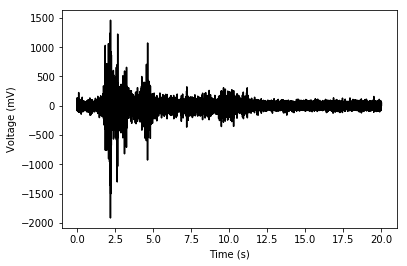

In [16]:
trace = df[df.task==TASK_NAME][setN][trialN][channelN]
time = np.linspace(0, round(np.size(trace)/fs), np.size(trace))

ax = plt.figure
plt.plot(time, trace, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Alternatively

In [17]:
TASK_NAME = 'bottle'
trialN = 4
channelN = 'ch160'
df[df.task==TASK_NAME][channelN].iloc[trialN]

array([31.00820042, 32.86077298, 34.85953921, ..., 27.05759072,
       28.87976104, 34.49130924])

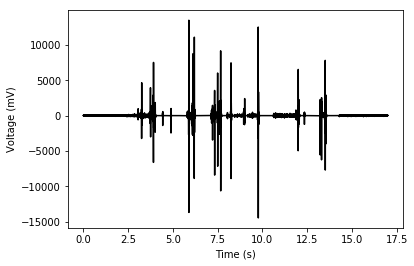

In [18]:
trace = df[df.task==TASK_NAME][channelN].iloc[trialN]
time = np.linspace(0, round(np.size(trace)/fs), np.size(trace))

ax = plt.figure
plt.plot(time, trace, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Time-step duration

In [19]:
#in bottle task, trial 3
print (df[df.task=='bottle'].t_steps.iloc[2])
print (df[df.task=='bottle']['t_steps'][3]) #index change

41598
41598


## Plot trials

### Layout reflecting electrode array disposition

Set 1, bottle task, trial 3

In [20]:
#plt.figure(figsize=(12, 10))

#for i in range(n_ch):
#    for j in range(n_ch):
        
#        ax = plt.subplot(n_ch,n_ch,n_ch*i+j+1)
#        ax.plot(df[df.task=='bottle'].set1.iloc[2][i][j][0],
#                color='k',
#                linewidth=.5)
#        ax.set_axis_off()

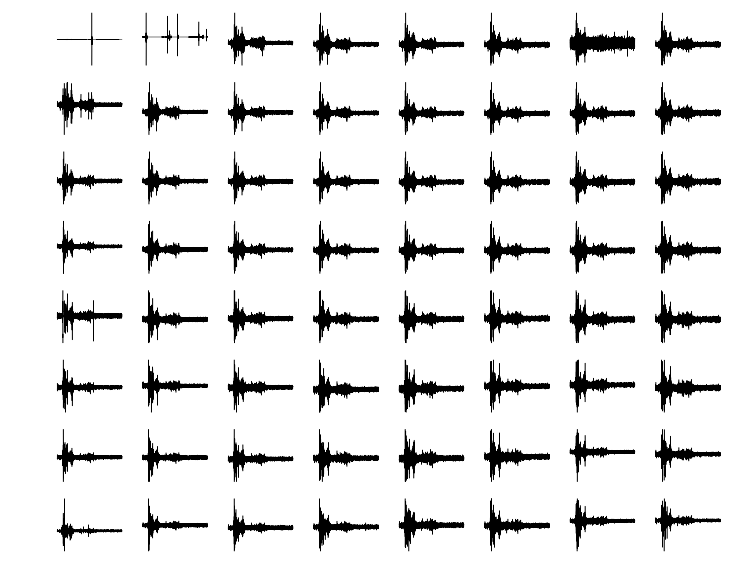

In [21]:
plt.figure(figsize=(12, 10))

TASK_NAME = 'bottle'
setN = 'set1'
trialN = 3
channelN = 54
df[df.task==TASK_NAME][setN][trialN][channelN]

for i in range(n_ch**2):
        
        ax = plt.subplot(n_ch,n_ch,i+1)
        ax.plot(df[df.task==TASK_NAME][setN][trialN][i],
                color='k',
                linewidth=.5)
        ax.set_axis_off()
        
plt.tight_layout
plt.show()

# Time-frequency decomposition

Example

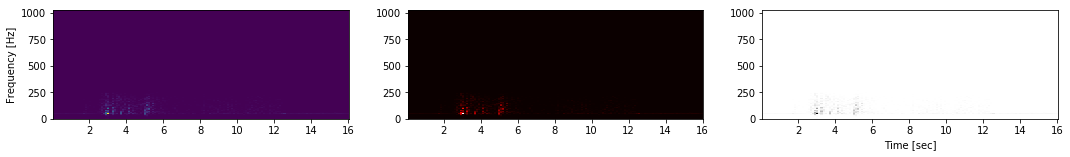

In [48]:
TASK_NAME = 'bottle'
trialN = 3
channelN = 'ch10'

x = df[df.task==TASK_NAME][channelN].iloc[trialN]

f, t, Sxx = signal.spectrogram(x, fs)

plt.figure(figsize=(18, 2))
ax = plt.subplot(131)
plt.pcolormesh(t, f, Sxx)
ax.set_ylabel('Frequency [Hz]')

ax = plt.subplot(132)
plt.pcolormesh(t, f, Sxx, cmap='hot')
#ax.set_ylim([40,100])
#ax.set_xlim([2.5,4])

ax = plt.subplot(133)
plt.pcolormesh(t, f, Sxx, cmap='binary')

plt.xlabel('Time [sec]')
plt.show()

In [38]:
np.max(Sxx)

4752.554455888178

In [36]:
np.max(Sxx)

2359.1420789793406

Compare trials over channels for one task (within subject)

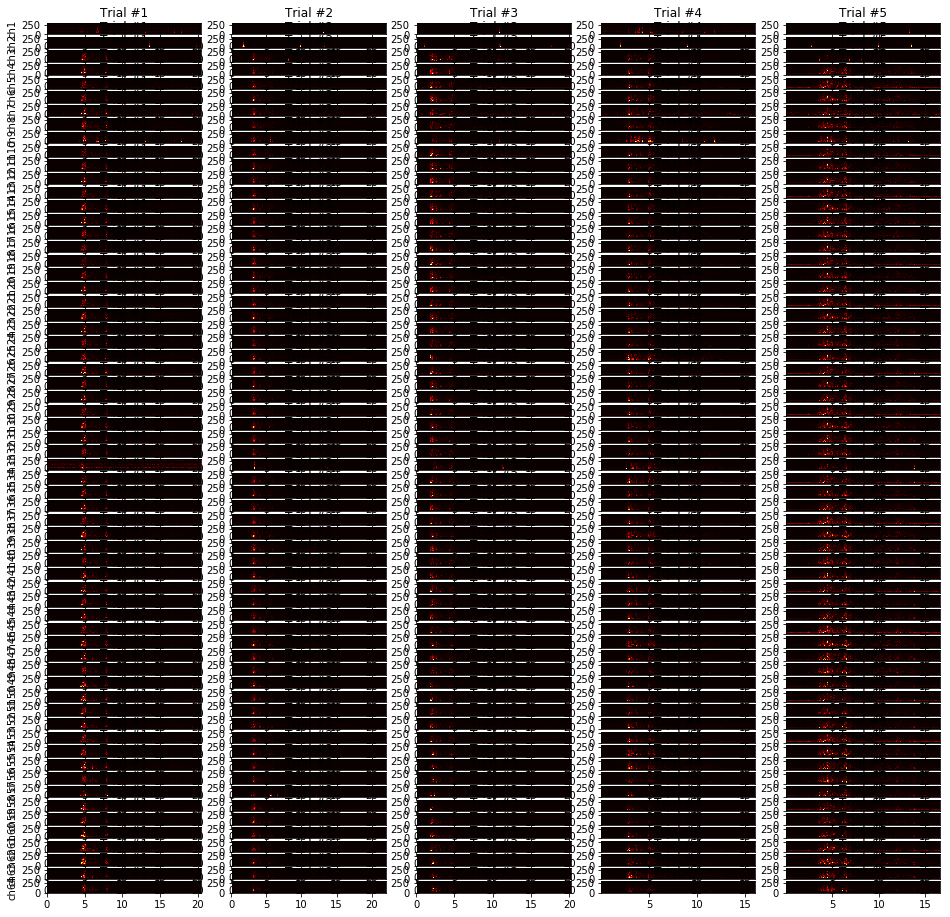

In [26]:
TASK_NAME = 'bottle'
trialN_tot = np.size(df[df.task==TASK_NAME],0)

plt.figure(figsize=(16, 16))
 
#for ch in range(n_ch_tot): #each channel, rows
for ch in range(n_ch**2): #each channel, rows
    for trialN in range(trialN_tot): #each trial, columns
        
        ax = plt.subplot(n_ch**2, trialN_tot, trialN_tot*ch+trialN+1)
        #ax = plt.subplot(192, 5, 5*ch+trialN+1 )
        #ax = plt.subplot((n_ch_tot,np.size(df[df.task==TASK_NAME],0),trialN_tot*ch+trialN+1)
        
        channelN = 'ch'+str(ch+1)
        x = df[df.task==TASK_NAME][channelN].iloc[trialN]
        f, t, Sxx = signal.spectrogram(x, fs)
        ax.pcolormesh(t, f, Sxx, cmap='hot')
        ax.set_ylim([0, 300])
        
        if trialN == 0:
            ax.set_ylabel('ch'+str(ch+1))
            
        if k == 0:
            ax.set_title('Trial #'+str(trialN+1))
        
        #ax.set_axis_off()
plt.tight_layout
plt.show()

It would be better to split on more columns, on a larger window.

Check time length from spectogram properties.

Prediction with just action onset?

In [ ]:
TASK_NAME = 'bottle'
trialN_tot = np.size(df[df.task==TASK_NAME],0)

time_dim = np.zeros((trialN_tot, n_ch_tot, 5))
freq_dim = np.zeros((trialN_tot, n_ch_tot, 2))

for ch in range(n_ch_tot): #each channel, rows

    for trialN in range(trialN_tot): #each trial, columns
        
        ax = plt.subplot(n_ch_tot, trialN_tot, trialN_tot*ch+trialN+1)

        x = df[df.task==TASK_NAME][channelN].iloc[trialN]
        f, t, Sxx = signal.spectrogram(x, fs)
        
        ind = np.where(Sxx/np.max(Sxx) > 0.05)
        time_dim[trialN, ch, :] = np.unique(ind[0])[0:5]
        
        #if time_dim != range(time_dim[0],time_dim[0]+4):
        #    for t in range(max(ind[0])-5):
        #        time_dim = np.unique(np.where(Sxx/np.max(Sxx) > 0.05)[0])[0+t:5+t]
            
        freq_dim[trialN, ch, :] = min(ind[1]), max(ind[1])
        
        #Sxx[Sxx/np.max(Sxx) > 0.05]

## Classifiers

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
predictors=df.columns[7:]

In [ ]:
X = df[predictors]
y = df['task']

In [ ]:
X

In [ ]:
y

In [ ]:
#SVM = sklearn.svm.SVC(kernel='rbf')
#SVM.fit(X, y)  
#SVM.score(X,y)

rfc = RandomForestClassifier()
rfc.fit(X, y)
rfc.score(X,y)

In [ ]:
#scoreSVM=([]);
scoreRFC=([]);

In [ ]:
for train,test in kf.split(df[predictors]): # for all non-linear models mentioned and all three predictor sets
    
    ## SVM
    #SVM =  sklearn.svm.SVC(kernel='rbf')
    #SVM.fit(X.iloc[train],y.iloc[train])
    #scoreSVM.append(SVM.score(X.iloc[test], y.iloc[test])) #accuracy
    
    ## RFC
    RFC =  RandomForestClassifier()
    RFC.fit(X.iloc[train],y.iloc[train])
    scoreRFC.append(RFC.score(X.iloc[test], y.iloc[test])) #accuracy

In [ ]:
#print (np.mean(scoreSVM))
#print (np.std(scoreSVM))

print (np.mean(scoreRFC))
print (np.std(scoreRFC))